In [2]:
from itertools import combinations
from operator import itemgetter
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
customer_df = pd.read_csv('customerdata.csv',low_memory=False)
# customer_df = pd.read_csv('customerdata.csv',low_memory=False, nrows = 1000)
customer_df.head()

,name,DELIVERY_DATE,CUSTOMER_ID,id,TIME_CREATED,product_item_id,PRODUCT_NAME,CATEGORY,QUANTITY,DELIVERY_QUANTITY,status,COMPLAINT_REASON,UNIT_MEASURE,code,PACKAGING,MRP,UNIT_PRICE,DISCOUNT
0,Bangalore,2021-03-07T00:00:00.000+05:30,24,23181828,2021-03-06T07:15:05.000+05:30,41534,Nandini Shubham-500ML Pouch,Milk,1,1,DELIVERED,NaN,500.0,ML,Pouch,22.0,22.0,0.0
1,Bangalore,2021-03-07T00:00:00.000+05:30,24,23181828,2021-03-06T07:15:05.000+05:30,41540,Nandini Toned Milk-500ML Pouch,Milk,1,1,DELIVERED,NaN,500.0,ML,Pouch,19.0,19.0,0.0
2,Bangalore,2021-03-07T00:00:00.000+05:30,33,23181829,2021-03-06T07:15:05.000+05:30,41569,Heritage Toned Milk-500ML Pouch,Milk,3,3,DELIVERED,NaN,500.0,ML,Pouch,21.0,21.0,0.0
3,Bangalore,2021-03-07T00:00:00.000+05:30,144,23181830,2021-03-06T07:15:05.000+05:30,41531,Heritage Full Cream Milk-500ML Pouch,Milk,2,2,DELIVERED,NaN,500.0,ML,Pouch,26.0,26.0,0.0
4,Bangalore,2021-03-07T00:00:00.000+05:30,144,23181830,2021-03-06T07:15:05.000+05:30,41536,Nandini Samrudhi-500ML Pouch,Milk,1,1,DELIVERED,NaN,500.0,ML,Pouch,23.0,23.0,0.0


In [4]:
frequent = pd.DataFrame(customer_df.groupby('id')["PRODUCT_NAME"].apply(list))
frequent

,PRODUCT_NAME
id,
23181828,"[Nandini Shubham-500ML Pouch, Nandini Toned Mi..."
23181829,[Heritage Toned Milk-500ML Pouch]
23181830,"[Heritage Full Cream Milk-500ML Pouch, Nandini..."
23181831,"[Nandini Toned Milk-500ML Pouch, Nandini Toned..."
23181832,"[Nandini Shubham-500ML Pouch, Nandini Curd-500..."
...,...
23634779,"[Onion-1KG Net Bag, Banana Raw-1PER PIECE Net ..."
23634780,[Nandini Pure Cow Ghee-1L Pet Jar]
23634781,"[Onion-1KG Net Bag, Cucumber Hybrid-500G Net B..."


In [5]:
def to_1D(series):
    return pd.Series([x for _list in series for x in _list])

In [6]:
unique_items = to_1D(frequent["PRODUCT_NAME"]).value_counts()

In [7]:
unique_items

Nandini Toned Milk-500ML Pouch                      85788
Nandini Shubham-500ML Pouch                         61154
Nandini Curd-500ML Pouch                            36564
Nandini Toned Milk-1L Pouch                         34661
Nandini Samrudhi-500ML Pouch                        30767
                                                    ...  
Milky Mist Chocolate Milk Shake-180ML Tetra Pack        1
Snicker Almond Bar-45G Pack                             1
Colgate Vedshakti Mouth Protect Spray-10G Bottle        1
Durex Kohinoor Xtra Time Condoms-10PCS Box              1
Bauli Moonfils Vanilla-45G Pouch                        1
Length: 2795, dtype: int64

In [8]:
def boolean_df(item_lists, unique_items):

    # Create empty dict
    bool_dict = {}
    
    # Loop through all the tags
    for i, item in enumerate(unique_items):
        
        # Apply boolean mask that returns a True-False list of whether a tag is in a taglist
        bool_dict[item] = item_lists.apply(lambda x: item in x)
            
    # Return the results as a dataframe
    return pd.DataFrame(bool_dict)

In [10]:
frequent_bool = boolean_df(frequent["PRODUCT_NAME"], unique_items.keys())

In [11]:
frequent_bool

,Nandini Toned Milk-500ML Pouch,Nandini Shubham-500ML Pouch,Nandini Curd-500ML Pouch,Nandini Toned Milk-1L Pouch,Nandini Samrudhi-500ML Pouch,Nandini Shubham-1L Pouch,Nandini Cow Milk-500ML Pouch,Heritage Toned Milk-500ML Pouch,Tender Coconut-1PER PIECE Shrink Wrap,Amul Taaza-500ML Pouch,...,Gulabs Mango Instant Drink-40G Pack,Unibic Cookies / Sugar Free Cashew-75G Box,Fresh To Home Burmese Prawn Curry - Marinades-300G Pouch,Borges Extra Light Olive Oil-250ML Glass Bottle,Lluvia Bakery Apple Cinnamon-650G Pouch,Milky Mist Chocolate Milk Shake-180ML Tetra Pack,Snicker Almond Bar-45G Pack,Colgate Vedshakti Mouth Protect Spray-10G Bottle,Durex Kohinoor Xtra Time Condoms-10PCS Box,Bauli Moonfils Vanilla-45G Pouch
id,,,,,,,,,,,,,,,,,,,,,
23181828,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
23181829,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
23181830,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
23181831,True,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
23181832,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23634779,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
23634780,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
23634781,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
frequent_int = frequent_bool.astype(int)
frequent_int.head(10)

,Nandini Toned Milk-500ML Pouch,Nandini Shubham-500ML Pouch,Nandini Curd-500ML Pouch,Nandini Toned Milk-1L Pouch,Nandini Samrudhi-500ML Pouch,Nandini Shubham-1L Pouch,Nandini Cow Milk-500ML Pouch,Heritage Toned Milk-500ML Pouch,Tender Coconut-1PER PIECE Shrink Wrap,Amul Taaza-500ML Pouch,...,Gulabs Mango Instant Drink-40G Pack,Unibic Cookies / Sugar Free Cashew-75G Box,Fresh To Home Burmese Prawn Curry - Marinades-300G Pouch,Borges Extra Light Olive Oil-250ML Glass Bottle,Lluvia Bakery Apple Cinnamon-650G Pouch,Milky Mist Chocolate Milk Shake-180ML Tetra Pack,Snicker Almond Bar-45G Pack,Colgate Vedshakti Mouth Protect Spray-10G Bottle,Durex Kohinoor Xtra Time Condoms-10PCS Box,Bauli Moonfils Vanilla-45G Pouch
id,,,,,,,,,,,,,,,,,,,,,
23181828,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23181829,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
23181830,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23181831,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23181832,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23181833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23181834,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23181835,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23181836,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
frequent_freq_mat = np.dot(frequent_int.T, frequent_int)

In [14]:
frequent_freq_mat

array([[85784,  5570, 12303, ...,     0,     0,     0],
       [ 5570, 61154,  7494, ...,     0,     0,     0],
       [12303,  7494, 36564, ...,     0,     1,     1],
       ...,
       [    0,     0,     0, ...,     1,     0,     0],
       [    0,     0,     1, ...,     0,     1,     0],
       [    0,     0,     1, ...,     0,     0,     1]])

In [15]:
frequent_freq = pd.DataFrame(frequent_freq_mat, columns = unique_items.keys(), index = unique_items.keys())

In [16]:
frequent_freq

,Nandini Toned Milk-500ML Pouch,Nandini Shubham-500ML Pouch,Nandini Curd-500ML Pouch,Nandini Toned Milk-1L Pouch,Nandini Samrudhi-500ML Pouch,Nandini Shubham-1L Pouch,Nandini Cow Milk-500ML Pouch,Heritage Toned Milk-500ML Pouch,Tender Coconut-1PER PIECE Shrink Wrap,Amul Taaza-500ML Pouch,...,Gulabs Mango Instant Drink-40G Pack,Unibic Cookies / Sugar Free Cashew-75G Box,Fresh To Home Burmese Prawn Curry - Marinades-300G Pouch,Borges Extra Light Olive Oil-250ML Glass Bottle,Lluvia Bakery Apple Cinnamon-650G Pouch,Milky Mist Chocolate Milk Shake-180ML Tetra Pack,Snicker Almond Bar-45G Pack,Colgate Vedshakti Mouth Protect Spray-10G Bottle,Durex Kohinoor Xtra Time Condoms-10PCS Box,Bauli Moonfils Vanilla-45G Pouch
Nandini Toned Milk-500ML Pouch,85784,5570,12303,8477,2438,1069,1359,531,1790,0,...,1,1,0,0,0,0,0,0,0,0
Nandini Shubham-500ML Pouch,5570,61154,7494,960,882,5654,929,423,1139,0,...,0,0,0,0,0,0,0,0,0,0
Nandini Curd-500ML Pouch,12303,7494,36564,3979,3157,2427,3047,703,823,0,...,1,0,0,0,0,0,0,0,1,1
Nandini Toned Milk-1L Pouch,8477,960,3979,34661,657,1231,501,104,648,0,...,0,0,0,0,0,0,0,0,0,0
Nandini Samrudhi-500ML Pouch,2438,882,3157,657,30767,301,684,185,666,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Milky Mist Chocolate Milk Shake-180ML Tetra Pack,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
Snicker Almond Bar-45G Pack,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
Colgate Vedshakti Mouth Protect Spray-10G Bottle,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Durex Kohinoor Xtra Time Condoms-10PCS Box,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [18]:
frequent.shape

(433752, 1)

In [17]:
frequent_freq.to_csv('frequent_freq.csv')

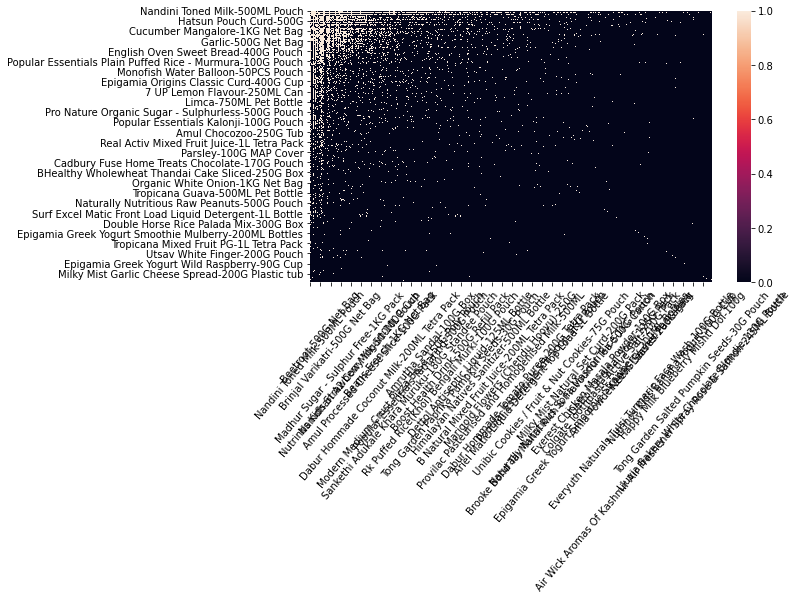

In [21]:
fig, ax = plt.subplots(figsize = (9,5))
sns.heatmap(frequent_freq,vmin=0, vmax=1)
plt.xticks(rotation=50)
plt.savefig("heatmap.png", dpi = 300)
